In [31]:
# import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [32]:
def read_dataframe():
    # Function to read the climate dataframe and remove rows which have anomolous data.
    # Returns the climate dataframe
    df = pd.read_excel("Climate Change.xlsx", skiprows=3)
    return df
df = read_dataframe()
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN


In [33]:
# List of features to consider for the assignment
df["Indicator Name"].unique()

array(['Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Community health workers (per 1,000 people)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CPIA public sector management and institutions cluster average (1=low to 6=high)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Marine protected areas (% of territorial waters)',
       'Terrestrial protected 

In [34]:
# Retreiving the required indicator code for the assignment
CO2_emission_df = df[df["Indicator Name"] == 'CO2 emissions (kt)']
population_df = df[df["Indicator Name"] == 'Population growth (annual %)']
greenhouse_gases_df=df[df["Indicator Name"]=='Total greenhouse gas emissions (kt of CO2 equivalent)']

In [35]:
CO2_emission_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
44,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,10450.0,8510.0,7810.0,7990.0,7390.0,7380.0,7440.0,NaN,NaN,NaN
272,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,30250.0,32820.0,34630.0,35160.0,35410.0,30840.0,27340.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19880,Kosovo,XKX,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19956,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,19680.0,26350.0,26710.0,14210.0,10880.0,10060.0,9310.0,NaN,NaN,NaN
20032,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,426710.0,436870.0,447980.0,424880.0,425180.0,435140.0,433250.0,NaN,NaN,NaN
20108,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,4020.0,4240.0,4800.0,5070.0,5590.0,6990.0,7740.0,NaN,NaN,NaN


In [36]:
CO2_emission_df['Total CO2 emissions']= CO2_emission_df.loc[:,'1960':'2020'].sum(axis=1)

In [37]:
CO2_emission_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total CO2 emissions
44,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
120,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
196,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,8510.0,7810.0,7990.0,7390.0,7380.0,7440.0,NaN,NaN,NaN,114580.0
272,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
348,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,32820.0,34630.0,35160.0,35410.0,30840.0,27340.0,NaN,NaN,NaN,565670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19880,Kosovo,XKX,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
19956,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,26350.0,26710.0,14210.0,10880.0,10060.0,9310.0,NaN,NaN,NaN,445440.0
20032,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,436870.0,447980.0,424880.0,425180.0,435140.0,433250.0,NaN,NaN,NaN,10148070.0
20108,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,4240.0,4800.0,5070.0,5590.0,6990.0,7740.0,NaN,NaN,NaN,88240.0


In [38]:
CO2_emission_df_total = CO2_emission_df.sort_values(by='Total CO2 emissions', ascending=False)
CO2_emission_df_total.head(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total CO2 emissions
3084,China,CHN,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,9936680.0,9894940.0,9830430.0,9814310.0,10017770.0,10313460.0,NaN,NaN,NaN,169414160.0
19120,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,5089500.0,5102580.0,4982790.0,4888640.0,4813720.0,4981300.0,NaN,NaN,NaN,153534870.0
15396,Russian Federation,RUS,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,1624020.0,1606860.0,1557530.0,1530900.0,1557190.0,1607550.0,NaN,NaN,NaN,46892050.0
8328,India,IND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,1966810.0,2136870.0,2150220.0,2183280.0,2301440.0,2434520.0,NaN,NaN,NaN,37396700.0
9088,Japan,JPN,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,1260900.0,1219820.0,1181500.0,1171390.0,1151930.0,1106150.0,NaN,NaN,NaN,34009280.0
4224,Germany,DEU,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,777630.0,737490.0,742310.0,747150.0,732200.0,709540.0,NaN,NaN,NaN,23704400.0
2704,Canada,CAN,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,556350.0,561830.0,558800.0,550480.0,562260.0,574400.0,NaN,NaN,NaN,14850020.0
6200,United Kingdom,GBR,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,453060.0,414850.0,400370.0,378890.0,366380.0,358800.0,NaN,NaN,NaN,14440390.0
9620,"Korea, Rep.",KOR,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,597640.0,586000.0,606510.0,614780.0,625350.0,630870.0,NaN,NaN,NaN,13766060.0
8556,"Iran, Islamic Rep.",IRN,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,592480.0,610670.0,602230.0,605760.0,620780.0,629290.0,NaN,NaN,NaN,12353110.0


In [39]:
px.bar(x='Country Name', y='Total CO2 emissions', data_frame= CO2_emission_df_total.head(15), title="Top 15 Countries with highest Co2 Emissions")

In [40]:
population_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN
80,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.539822,2.575182,2.606839,2.633213,2.656488,...,2.763426,2.761496,2.750400,2.732598,2.712218,2.690902,2.665620,2.636666,2.605427,NaN
156,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.898499,1.965805,2.029830,2.090208,2.147639,...,3.407600,3.494592,3.355602,3.077054,2.778035,2.547833,2.384309,2.313073,2.303812,NaN
232,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,2.034308,2.085972,2.133725,2.173361,2.202845,2.226134,...,2.763803,2.753564,2.745542,2.738332,2.730332,2.719330,2.704168,2.684152,2.660902,NaN
308,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.392891,1.383296,1.256405,0.973970,0.618450,...,3.597755,3.551997,3.497447,3.438869,3.378269,3.322158,3.276145,3.242914,3.218530,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19840,Kosovo,XKX,Population growth (annual %),SP.POP.GROW,NaN,1.986474,2.857337,2.777956,2.702867,2.631731,...,0.895255,0.607468,-0.294474,-1.364932,-0.596734,0.753585,0.339011,-0.457730,0.070131,NaN
19916,"Yemen, Rep.",YEM,Population growth (annual %),SP.POP.GROW,NaN,1.450907,1.484139,1.506696,1.515089,1.515455,...,2.757339,2.716540,2.654141,2.578030,2.498277,2.423989,2.357044,2.300594,2.251561,NaN
19992,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,NaN,2.453291,2.486444,2.514218,2.535789,2.552492,...,1.581354,1.604367,1.583787,1.532243,1.471933,1.416947,1.363703,1.316292,1.273356,NaN
20068,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,NaN,3.000974,2.998369,3.004541,3.022576,3.049993,...,3.102914,3.139940,3.121249,3.066671,3.002935,2.951463,2.912653,2.893018,2.885686,NaN


In [41]:
population_df['Total Population Growth']= population_df.loc[:,'1960':'2020'].sum(axis=1)

population_df_total=population_df.sort_values(by='Total Population Growth', ascending=False)
population_df_total.head(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total Population Growth
612,United Arab Emirates,ARE,Population growth (annual %),SP.POP.GROW,NaN,8.683733,10.635010,10.985483,9.825550,8.205947,...,0.614086,0.176775,0.527292,1.053271,1.339470,1.503938,1.438677,1.219429,NaN,467.300892
15204,Qatar,QAT,Population growth (annual %),SP.POP.GROW,NaN,8.189981,8.992712,9.253378,9.042147,8.602044,...,6.201485,5.114901,4.239756,3.397627,2.615751,2.068754,1.795247,1.715004,NaN,410.765005
9656,Kuwait,KWT,Population growth (annual %),SP.POP.GROW,NaN,11.090924,11.539184,11.578309,11.260538,10.754920,...,5.165482,4.560848,3.844185,3.112854,2.477113,1.982437,1.672132,1.497756,NaN,299.967872
17104,Sint Maarten (Dutch part),SXM,Population growth (annual %),SP.POP.GROW,NaN,8.261888,9.006704,9.512116,9.277832,9.322715,...,5.523040,2.902266,2.980223,2.903978,1.502331,0.788034,1.728465,1.673101,NaN,270.368724
4260,Djibouti,DJI,Population growth (annual %),SP.POP.GROW,NaN,5.658631,6.241558,6.587914,6.692218,6.647006,...,1.731198,1.729670,1.687132,1.640629,1.599742,1.557869,1.514560,1.472835,NaN,246.923459
8972,Jordan,JOR,Population growth (annual %),SP.POP.GROW,NaN,4.287933,3.695215,3.840133,4.850120,6.258525,...,5.167387,4.586585,3.824975,3.057623,2.394659,1.817482,1.359216,0.999209,NaN,239.193628
1676,Bahrain,BHR,Population growth (annual %),SP.POP.GROW,NaN,3.312162,3.073791,2.848047,2.629296,2.454217,...,1.153907,1.587600,2.642767,3.856577,4.678047,4.921024,4.468688,3.615325,NaN,234.907329
11176,St. Martin (French part),MAF,Population growth (annual %),SP.POP.GROW,NaN,2.483026,2.031281,2.446531,2.900805,3.853207,...,-1.508127,-1.214210,-0.425692,0.545006,1.398894,1.882683,1.961108,1.714082,NaN,229.431601
13836,Oman,OMN,Population growth (annual %),SP.POP.GROW,NaN,2.356493,2.437085,2.503020,2.560378,2.612362,...,7.349583,6.738894,5.790591,4.845734,4.083806,3.445166,2.968579,2.611437,NaN,222.522555
15584,Saudi Arabia,SAU,Population growth (annual %),SP.POP.GROW,NaN,3.186588,3.354825,3.463491,3.497566,3.494298,...,3.030794,2.836221,2.558077,2.262423,2.007066,1.801062,1.664777,1.578837,NaN,214.231861


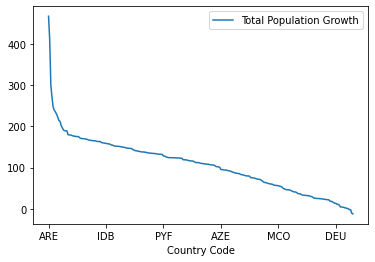

In [49]:
population_df_total.plot("Country Code", y=[ "Total Population Growth"])
plt.show()

In [42]:
greenhouse_gases_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
34,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Africa Eastern and Southern,AFE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,1381860.0,1406900.0,1436410.0,1436770.0,1457530.0,1471620.0,1478910.0,NaN,NaN,NaN
186,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,66750.0,74800.0,84620.0,93730.0,95370.0,97300.0,98920.0,NaN,NaN,NaN
262,Africa Western and Central,AFW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,740720.0,771100.0,790820.0,805370.0,835230.0,848650.0,881570.0,NaN,NaN,NaN
338,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,84930.0,88410.0,88980.0,90620.0,91240.0,87180.0,79730.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19870,Kosovo,XKX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19946,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,31470.0,38350.0,38810.0,26050.0,22740.0,21970.0,21760.0,NaN,NaN,NaN
20022,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,503110.0,513020.0,525050.0,501090.0,501550.0,514600.0,513440.0,NaN,NaN,NaN
20098,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,36130.0,37220.0,37680.0,38840.0,39100.0,39670.0,40670.0,NaN,NaN,NaN


In [43]:
greenhouse_gases_df['Total Greenhouse Gases']= greenhouse_gases_df.loc[:,'1970':'2019'].sum(axis=1)

greenhouse_gases_df_total=greenhouse_gases_df.sort_values(by='Total Greenhouse Gases', ascending=False)
greenhouse_gases_df_total.head(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total Greenhouse Gases
19718,World,WLD,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,44233530.0,44438190.0,44423270.0,44550150.0,45117640.0,45873850.0,NaN,NaN,NaN,1.692608e+09
7862,IDA & IBRD total,IBT,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,29542690.0,29874230.0,29916640.0,30173010.0,30772000.0,31474040.0,NaN,NaN,NaN,9.887879e+08
10674,Low & middle income,LMY,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,28784830.0,29139510.0,29181020.0,29444030.0,30032290.0,30740280.0,NaN,NaN,NaN,9.568050e+08
11890,Middle income,MIC,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,27773550.0,28098720.0,28130250.0,28356260.0,28938630.0,29631920.0,NaN,NaN,NaN,8.971472e+08
7786,IBRD only,IBD,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,26829890.0,27090890.0,27068200.0,27222310.0,27745020.0,28366540.0,NaN,NaN,NaN,8.539986e+08
13790,OECD members,OED,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,15102990.0,14916100.0,14848340.0,14752500.0,14769390.0,14851080.0,NaN,NaN,NaN,7.329260e+08
7254,High income,HIC,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,15164560.0,15013220.0,14971270.0,14848520.0,14841780.0,14899650.0,NaN,NaN,NaN,7.257505e+08
15082,Post-demographic dividend,PST,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,13826310.0,13605880.0,13441280.0,13294470.0,13237560.0,13324230.0,NaN,NaN,NaN,6.952276e+08
18958,Upper middle income,UMC,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,19929050.0,19964160.0,19902580.0,19945090.0,20273020.0,20624200.0,NaN,NaN,NaN,6.111395e+08
10826,Late-demographic dividend,LTE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,18722310.0,18733120.0,18755290.0,18789010.0,19080610.0,19448630.0,NaN,NaN,NaN,5.772143e+08


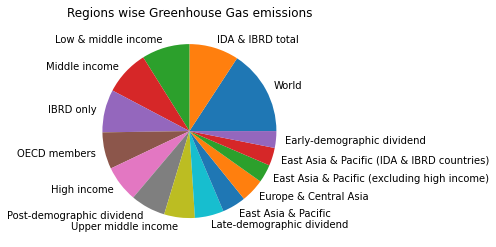

In [47]:
plt.figure
plt.pie(greenhouse_gases_df_total.head(15)["Total Greenhouse Gases"], labels=greenhouse_gases_df_total.head(15)["Country Name"])
plt.title("Regions wise Greenhouse Gas emissions")
plt.show()